In [18]:
import tensorflow.keras
tensorflow.keras.__version__

'2.1.6-tf'

# Первое знакомство с нейронной сетью

Рассмотрим конкретный пример нейронной сети, которая обучается классифика-
ции рукописных цифр и создана с помощью библиотеки Keras для Python. Если
у вас нет опыта использования Keras или других подобных библиотек, возможно,
вы не все поймете в этом первом примере. Может быть, вы еще не установили Keras;
в этом нет ничего страшного. В следующей главе мы рассмотрим каждый элемент
в примере и подробно объясним их. Поэтому не волнуйтесь, если какие-то шаги
покажутся непонятным и или похожими на магию. В конце концов, мы должны
с чего-то начать.

Перед нами стоит задача: реализовать классификацию черно-белых изображений
рукописных цифр (28 × 28 пикселов) по 10 категориям (от 0 до 9). Мы будем
использовать набор данных MNIST, популярный в сообществе исследователей
глубокого обучения, который существует практически столько же, сколько сама
область машинного обучения, и широко используется для обучения. Этот набор
содержит 60 000 обучающих изображений и 10 000 контрольных изображений,
собранных Национальным институтом стандартов и технологий США (National
Institute of Standards and Technology — часть NIST в аббревиатуре MNIST) в 1980‐х.
«Решение» задачи MNIST можно рассматривать как своеобразный аналог «Hello
World» в глубоком обучении — часто это первое действие, которое выполняется,
чтобы убедиться, что алгоритмы действуют в точности как ожидалось. По мере
углубления в практику машинного обучения вы увидите, что MNIST часто упоминается в научных статьях, блогах и т. д.

Набор данных MNIST уже входит в состав Keras в форме набора из четырех мас-
сивов Numpy.

In [19]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Здесь train_images и  train_labels  — это тренировочный набор, то есть данные,
необходимые для обучения. После обучения модель будет проверяться тестовым
(или контрольным) набором, test_images и  test_labels.
Изображения хранятся в массивах Numpy, а метки — в массиве цифр от 0 до 9. Изо-
бражения и метки находятся в прямом соответствии, один к одному.

Рассмотрим обучающие данные:

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

И контрольные данные:

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
len(test_labels)

10000

In [25]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Сначала передадим нейронной сети обучающие данные, train_images и  train_labels.
В результате этого сеть обучится сопоставлять изображения с метками.
Затем мы предложим сети классифицировать изображения в  test_images и
проверим точность классификации по меткам из test_labels.
Теперь сконструируем сеть.

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Основным строительным блоком нейронных сетей является слой (или уровень),
модуль обработки данных, который можно рассматривать как фильтр для данных.
Он принимает некоторые данные и выводит их в более полезной форме. В частности,
слои извлекают представления из подаваемых в них данных, которые, как мы
надеемся, будут иметь больше смысла для решаемой задачи. Фактически методика
глубокого обучения заключается в объединении простых слоев, реализующих не-
которую форму поэтапной очистки данных. Модель глубокого обучения можно
сравнить с ситом, состоящим из последовательности фильтров все более тонкой
очистки данных — слоев.

В данном случае наша сеть состоит из последовательности двух слоев Dense , которые являются тесно связанными (их еще называют полносвязными) нейронными слоями. Второй (и последний) слой — это 10-переменный слой потерь (softmax
layer), возвращающий массив с 10 оценками вероятностей (в сумме дающих 1).
Каждая оценка определяет вероятность принадлежности текущего изображения
к одному из 10 классов цифр.

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:

* функцию потерь, которая определяет, как сеть должна оценивать качество
своей работы на обучающих данных и, соответственно, как корректировать ее
в правильном направлении;
* оптимизатор — механизм, с помощью которого сеть будет обновлять себя,
опираясь на наблюдаемые данные и функцию потерь;
* метрики для мониторинга на этапах обучения и тестирования — здесь нас
будет интересовать только точность (доля правильно классифицированных
изображений).

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Перед обучением мы выполним предварительную обработку данных, преобразовав
их в форму, которую ожидает получить нейронная сеть, и масштабируем их так,
чтобы все значения оказались в интервале [0, 1] . Исходные данные — обучаю-
щие изображения — хранятся в трехмерном массиве (60000, 28, 28) типа uint8 ,
значениями в котором являются числа в интервале [0, 255] . Мы преобразуем его
в массив (60000, 28 * 28) типа float32 со значениями в интервале [0, 1] .

In [28]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Нам также нужно закодировать метки категорий. Этот шаг подробнее объясняется позже.

In [29]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Теперь можно начинать обучение сети, для чего в случае использования библиотеки
Keras достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель
под обучающие данные:

In [30]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.2599 - acc: 0.9239
Epoch 2/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.1038 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.0680 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.0499 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.0372 - acc: 0.9887


В процессе обучения отображаются две величины: потери сети на обучающих
данных и точность сети на обучающих данных.
В данном случае мы достигли точности 0,9972 (99,7%) на обучающих данных. Теперь
проверим, как модель распознает контрольный набор:

In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 18us/step


In [32]:
print('test_acc:', test_acc)

('test_acc:', 0.9813)


Точность на контрольном наборе составила 98,1 % — немного меньше, чем на трени-
ровочном наборе. Эта разница между точностью на тренировочном и контрольном
наборах демонстрирует пример переобучения (overfitting), когда модели машинного
обучения показывают худшую точность на новом наборе данных по сравнению
с тренировочным. Основная речь о переобучении пойдет позже.

In [33]:
pr=network.predict(test_images)[1]
pr

array([3.3505327e-11, 4.1083820e-07, 9.9999940e-01, 8.4809969e-08,
       7.5834258e-17, 3.2604346e-09, 1.3253010e-09, 3.4211181e-17,
       7.3030762e-08, 6.4009145e-15], dtype=float32)

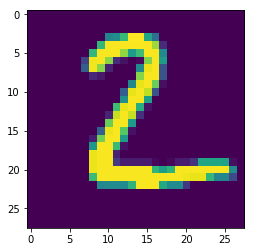

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(test_images[1].reshape([28,28]))